Please download diabetes.csv on https://www.kaggle.com/datasets/whenamancodes/predict-diabities?resource=download and put the file on ../data

In [1]:
import pandas as pd

### Load the dataset and put it on a Pandas dataframe

In [6]:
df = pd.read_csv('../data/diabetes.csv')

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Let's visualize analyze how each feature (column) differs from each class

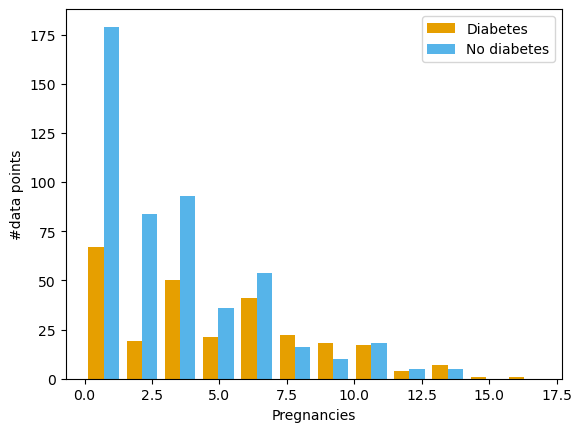

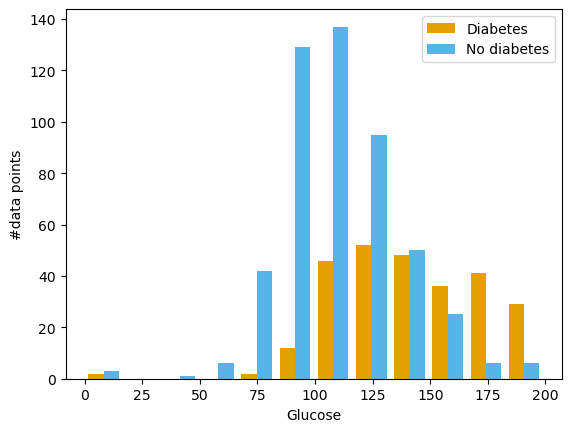

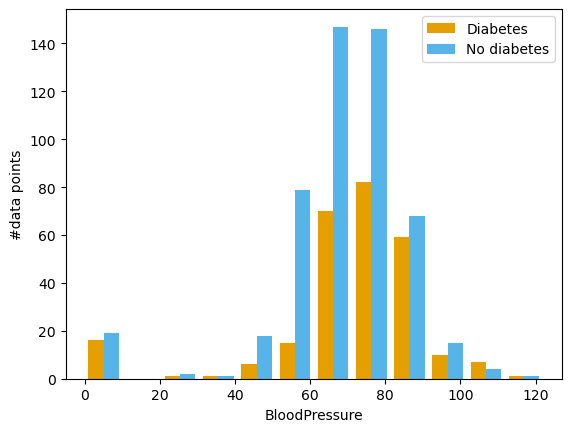

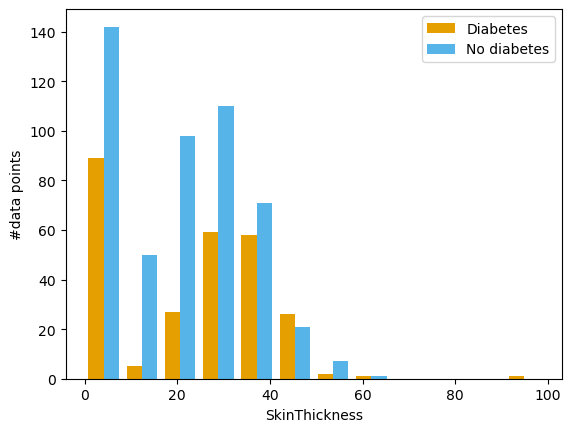

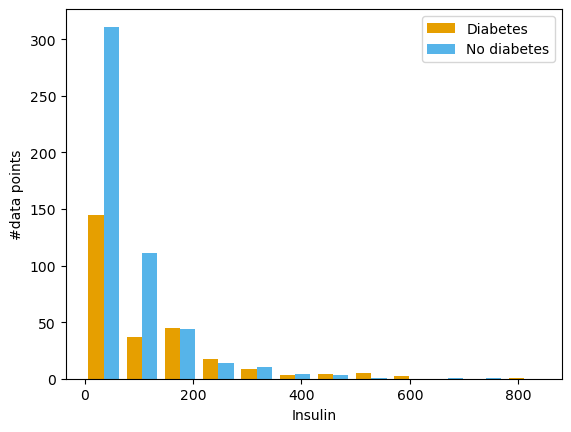

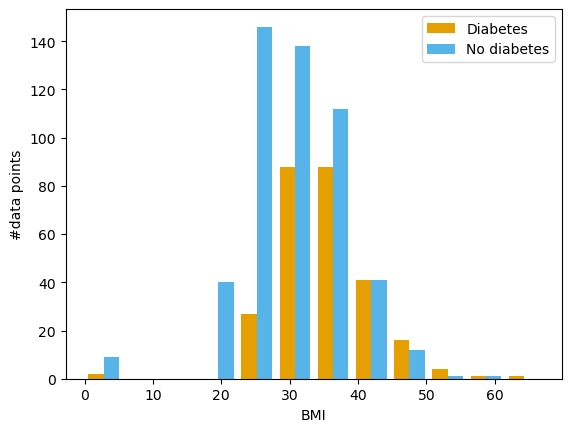

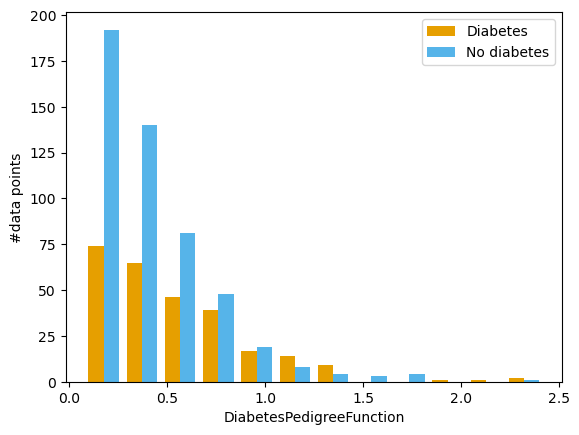

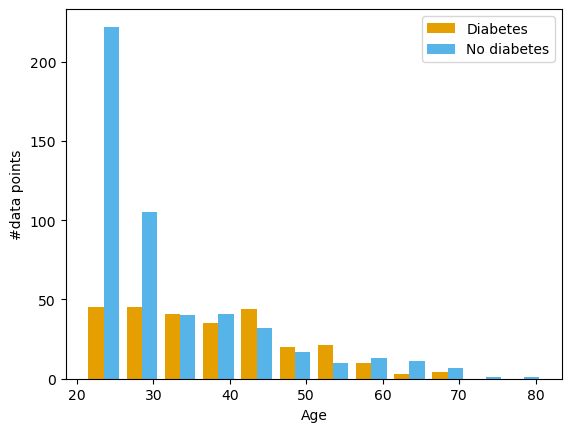

In [28]:
import matplotlib.pyplot as plt

for column in df.columns:
    if column != 'Outcome':

        # Make a separate list for each class
        x1 = list(df[df['Outcome'] == 1][column])
        x2 = list(df[df['Outcome'] == 0][column])

        # Assign colors for each class and the names
        colors = ['#E69F00', '#56B4E9']
        names = ['Diabetes', 'No diabetes']

        # Make the histogram using a list of lists
        plt.hist([x1, x2], bins = int(180/15),
                 color = colors, label=names)

        # Plot formatting
        plt.legend()
        plt.xlabel(column)
        plt.ylabel('#data points')
        plt.show()
        #plt.title('Side-by-Side Histogram with Multiple Airlines')

In [10]:
Y = df['Outcome'].to_numpy()

In [13]:
X = df.loc[:, df.columns != 'Outcome'].to_numpy()

### Let's visualize all features together

/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


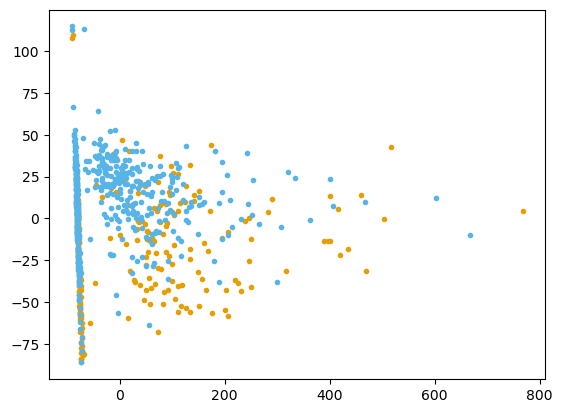

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X)

X_pca1 = pca.transform( df[df['Outcome'] == 1].loc[:, df.columns != 'Outcome'] )
plt.scatter( X_pca1[:,0], X_pca1[:,1], color=colors[0], label=names[0], marker='.')

X_pca2 = pca.transform( df[df['Outcome'] == 0].loc[:, df.columns != 'Outcome'] )
plt.scatter( X_pca2[:,0], X_pca2[:,1], color=colors[1], label=names[1], marker='.')


plt.show()

In [14]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [16]:
scaler.transform(X)

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


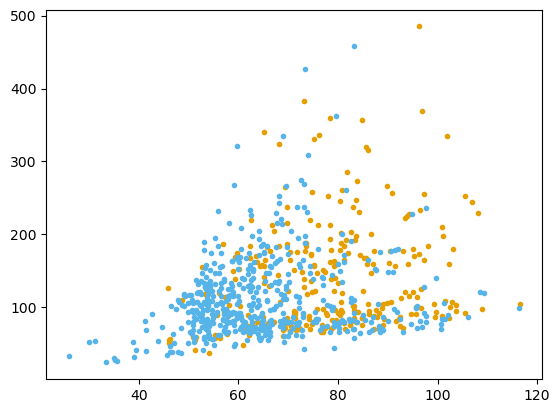

In [44]:
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)

pca = PCA(n_components=2)
pca.fit(X_transformed)

X_pca1 = pca.transform( df[df['Outcome'] == 1].loc[:, df.columns != 'Outcome'] )
plt.scatter( X_pca1[:,0], X_pca1[:,1], color=colors[0], label=names[0], marker='.')

X_pca2 = pca.transform( df[df['Outcome'] == 0].loc[:, df.columns != 'Outcome'] )
plt.scatter( X_pca2[:,0], X_pca2[:,1], color=colors[1], label=names[1], marker='.')


plt.show()